# (Ford-GoBike Share)


## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Time and dates at which riders used to go on a ride, also some members identifications like age and membership status are included as well for each member. To analyze the main factors upon which may or may not affect the duration the individual take during the trip.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta
import missingno as msno
from math import radians, cos, sin, asin, sqrt
%matplotlib inline

In [ ]:
df = pd.read_csv('2019-fordgobike-San Franscisco.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
print(df.shape)
df.info()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

<AxesSubplot:>

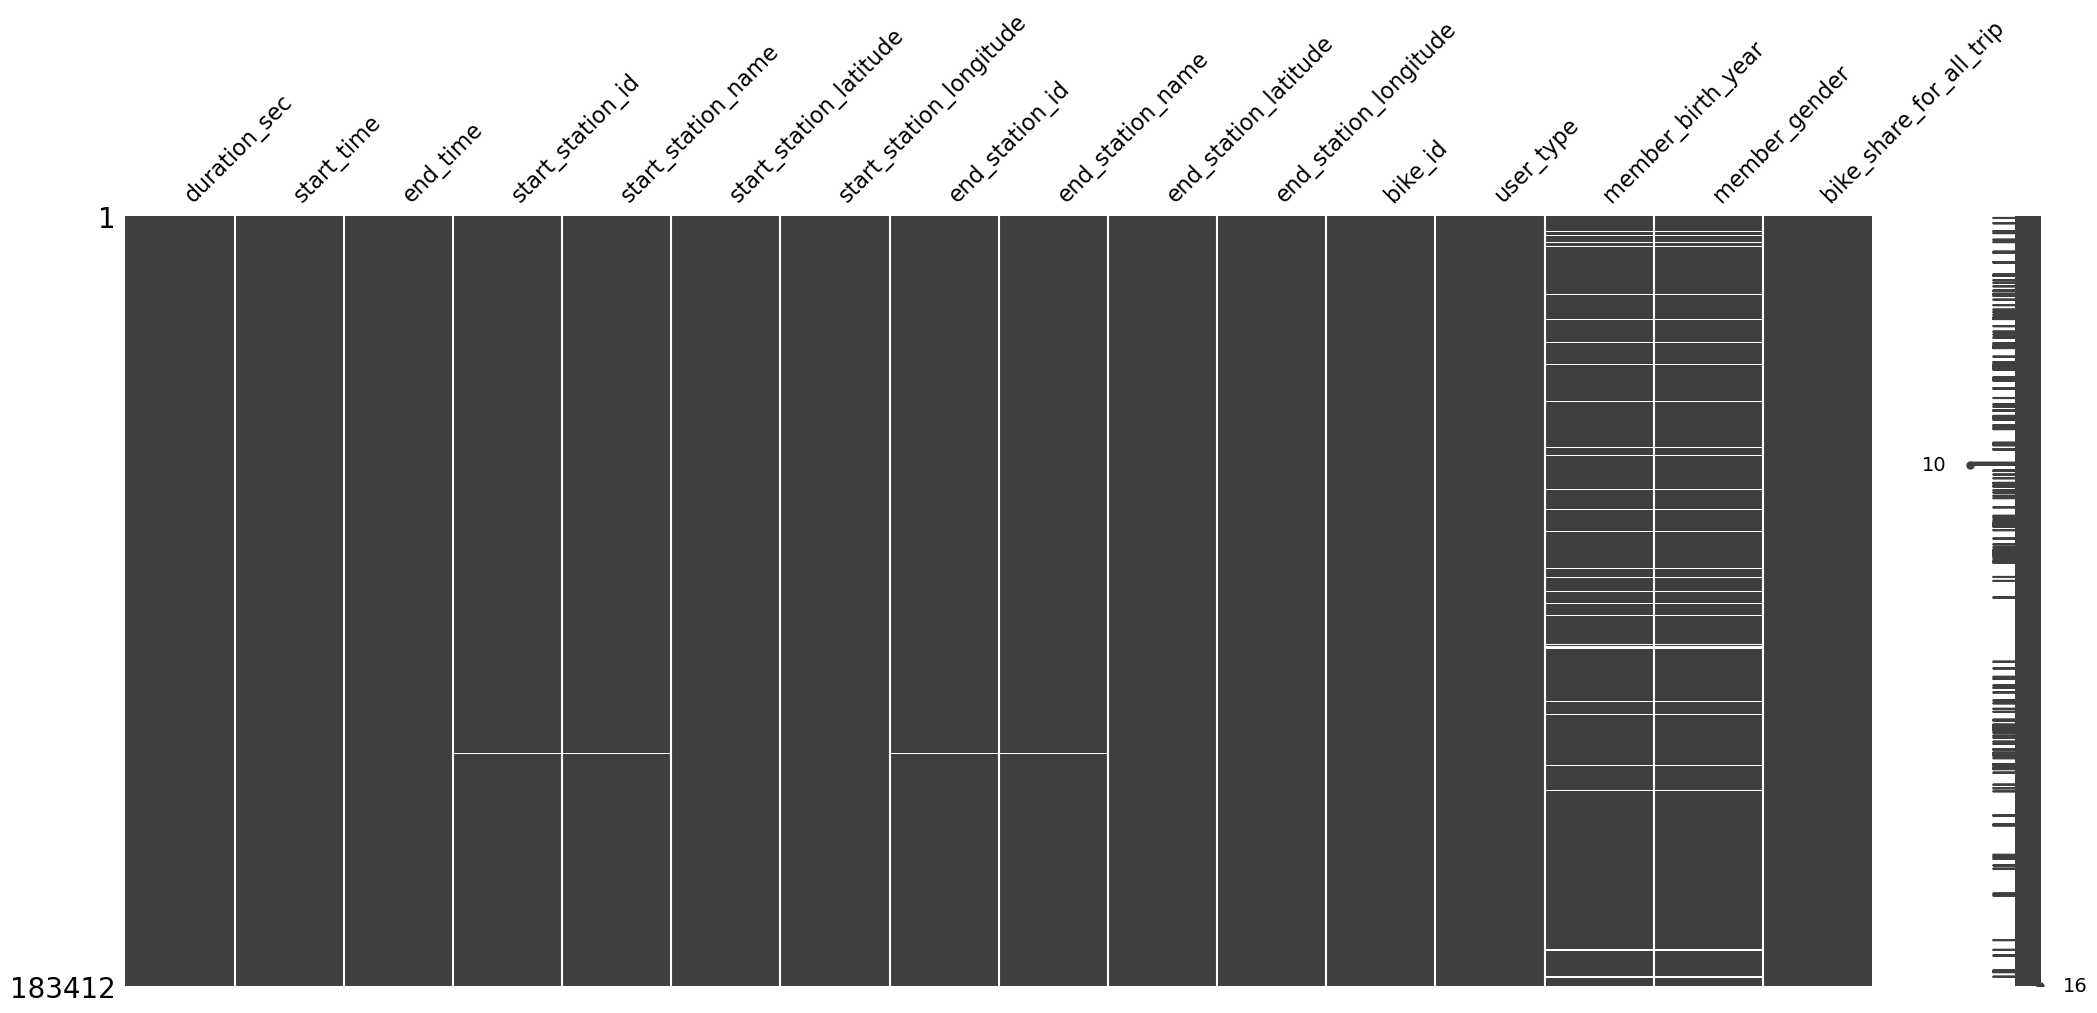

In [ ]:
msno.matrix(df)

In [ ]:
(df['member_birth_year'].isnull() == df['member_gender'].isnull()).count()

183412

This indicates that all the null values for member_birth_year and member_gender colums are on the same rows.

In [ ]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [ ]:
df[df['member_birth_year']== 1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No


In [ ]:
df.drop(df[df['member_birth_year']== 1878].index,inplace=True)

In [ ]:
print('Total number of stations :' , df['start_station_name'].value_counts().count())
print('Total number of bikes :', df['bike_id'].value_counts().count())

Total number of stations : 329
Total number of bikes : 4646


There is a total of 4646 bikes and 329 stations.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
print('Total number of stations :' , df['start_station_name'].value_counts().count())
print('Total number of bikes :', df['bike_id'].value_counts().count())

Total number of stations : 329
Total number of bikes : 4607


- After deleting the rows with missing values. There is 4606 bikes present in the dataset.<br> This means there is a total of 40 bikes id deleted, this is less than 1% of the total bikes so this should not really affect the analysis.
- The total number of stations is still the same.

In [ ]:
df['bike_id']=df['bike_id'].apply(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174951 entries, 0 to 174950
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174951 non-null  int64  
 1   start_time               174951 non-null  object 
 2   end_time                 174951 non-null  object 
 3   start_station_id         174951 non-null  float64
 4   start_station_name       174951 non-null  object 
 5   start_station_latitude   174951 non-null  float64
 6   start_station_longitude  174951 non-null  float64
 7   end_station_id           174951 non-null  float64
 8   end_station_name         174951 non-null  object 
 9   end_station_latitude     174951 non-null  float64
 10  end_station_longitude    174951 non-null  float64
 11  bike_id                  174951 non-null  object 
 12  user_type                174951 non-null  object 
 13  member_birth_year        174951 non-null  float64
 14  memb

**After Some exploration to the data we going to remove the unwanted columns**

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [ ]:
#we want to find the disatance between the start_station and end_station for each trip.

lat_1 = df['start_station_latitude']/(180/np.pi)
lat_2 = df['end_station_latitude']/(180/np.pi)
lon_1 = df['start_station_longitude']/(180/np.pi)
lon_2 = df['end_station_longitude']/(180/np.pi)

dlon = lon_2 - lon_1
dlat = lat_2 - lat_1

a = np.sin(dlat / 2)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(dlon / 2)**2
c = 2 * (np.arcsin(np.sqrt(a)))
r= 6371
df['distance/Km'] = c*6371

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance/Km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.332203


In [ ]:
df.drop(columns=['start_station_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','end_station_id'],inplace=True)

In [ ]:
df['distance/Km']=df['distance/Km'].round(decimals=2)
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance/Km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.54
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.70
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.26
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.41
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.33


In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [ ]:
df['start_day']= df['start_time'].dt.day_name()
df['start_hour']= df['start_time'].dt.hour


In [ ]:
df['duration'] = pd.to_timedelta(df['duration_sec'], unit='s')
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance/Km,start_day,start_hour,duration
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.54,Thursday,17,0 days 14:29:45
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.70,Thursday,12,0 days 17:10:54
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.26,Thursday,17,0 days 10:08:10
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.41,Thursday,23,0 days 00:26:25
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.33,Thursday,23,0 days 00:29:53


In [ ]:
df['age']= df.start_time.dt.year - df.member_birth_year

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance/Km,start_day,start_hour,duration,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.54,Thursday,17,0 days 14:29:45,35.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.70,Thursday,12,0 days 17:10:54,47.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.26,Thursday,17,0 days 10:08:10,30.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.41,Thursday,23,0 days 00:26:25,45.0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,3.33,Thursday,23,0 days 00:29:53,60.0


In [ ]:
#Replace the position of the columns in the dataframe to look a bit organized.
df.insert(0,'duration', df.pop('duration'))
df.insert(9,'age', df.pop('age'))
df.insert(3,'start_day',df.pop('start_day'))
df.insert(4,'start_hour',df.pop('start_hour'))
df.head()

,duration,duration_sec,start_time,start_day,start_hour,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip,distance/Km
0,0 days 14:29:45,52185,2019-02-28 17:32:10.145,Thursday,17,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,35.0,Male,No,0.54
1,0 days 17:10:54,61854,2019-02-28 12:13:13.218,Thursday,12,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,47.0,Male,No,2.70
2,0 days 10:08:10,36490,2019-02-28 17:54:26.010,Thursday,17,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,30.0,Other,No,0.26
3,0 days 00:26:25,1585,2019-02-28 23:54:18.549,Thursday,23,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,45.0,Male,Yes,2.41
4,0 days 00:29:53,1793,2019-02-28 23:49:58.632,Thursday,23,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,60.0,Male,No,3.33


In [ ]:
df.head()

,duration,duration_sec,start_time,start_day,start_hour,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip,distance/Km
0,0 days 14:29:45,52185,2019-02-28 17:32:10.145,Thursday,17,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,35.0,Male,No,0.54
1,0 days 17:10:54,61854,2019-02-28 12:13:13.218,Thursday,12,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,47.0,Male,No,2.70
2,0 days 10:08:10,36490,2019-02-28 17:54:26.010,Thursday,17,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,30.0,Other,No,0.26
3,0 days 00:26:25,1585,2019-02-28 23:54:18.549,Thursday,23,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,45.0,Male,Yes,2.41
4,0 days 00:29:53,1793,2019-02-28 23:49:58.632,Thursday,23,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,60.0,Male,No,3.33


### What is the structure of your dataset?

A total of 15 columns and 174591 rows. New columns like distance/Km, duration, start_day, and start_hour were added to give better analysis and insights on the data.

### What is/are the main feature(s) of interest in your dataset?

The duration, and distance between stations are important nmerical features of the trips.<br> There are other caterogical features like start and end station names, bike id, age, and gender.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
start_station and end_station can give us information on the most busy stations.<br>The duration can give us insights on how much on average the trips take.<br> The distance between stations may give us insights on the optimmun distance between stations that the customers use.<br> Age and gender are great information for knowing the best target audience in the advertising campaigns.<br> The bike id can give us information on the most used bikes to look for their maintenance.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
print(df['duration'].describe())
print("The highest duration trips:\n",df['duration'].sort_values(ascending=False).head(10))

count                       174951
mean     0 days 00:11:43.998342393
std      0 days 00:27:22.208566500
min                0 days 00:01:01
25%                0 days 00:05:23
50%                0 days 00:08:30
75%                0 days 00:13:09
max                0 days 23:29:08
Name: duration, dtype: object
The highest duration trips:
 81603    0 days 23:29:08
122162   0 days 23:11:59
107290   0 days 23:10:07
4987     0 days 23:06:35
91252    0 days 22:55:12
8291     0 days 22:39:09
102615   0 days 22:05:48
85961    0 days 20:40:08
82495    0 days 20:34:57
117807   0 days 20:32:10
Name: duration, dtype: timedelta64[ns]


The average trip is around 12 mins. However, there are few high outliers which exceed 20 hours per trip.<br> This causes the average value to be slightly higher than most of the actual trip durations. In this case the median which is 8.5 min is a better representation of the majority of trips.

Text(0.5, 1.0, 'Trip duration counts')

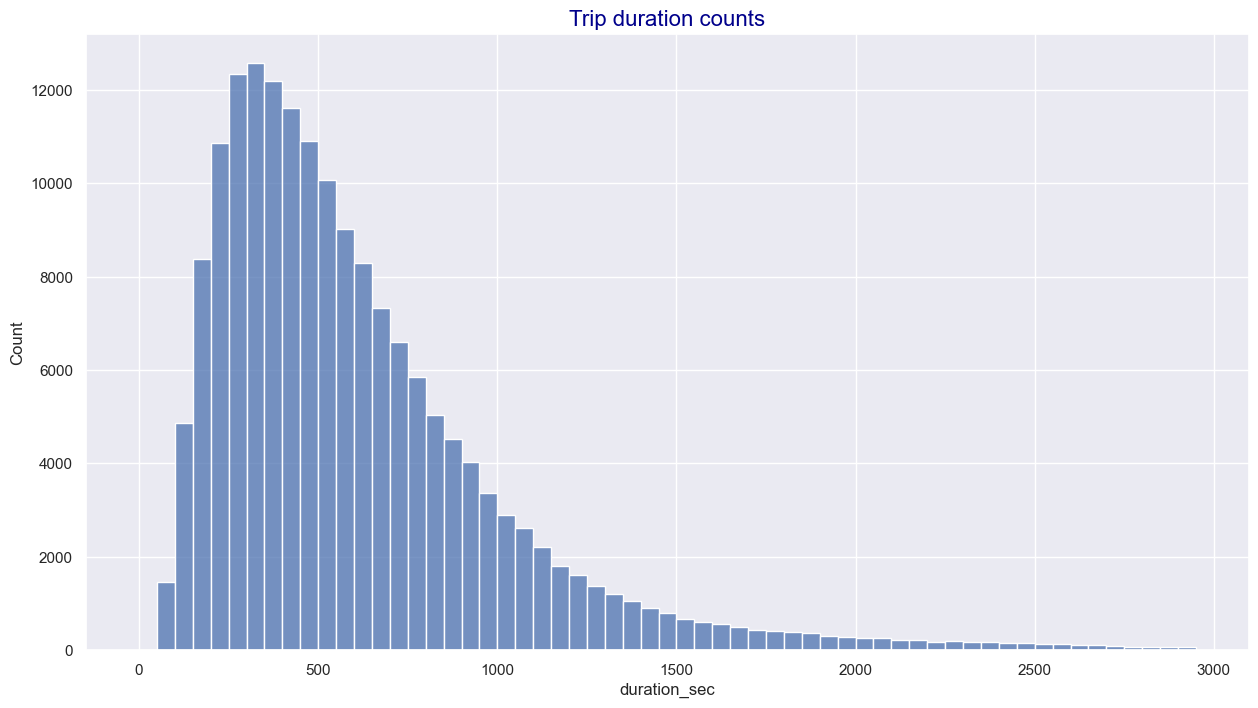

In [ ]:
sb.set(style="darkgrid")
plt.figure(figsize=(15,8))
bin = np.arange(0,3000,50)
sb.histplot(data=df,x='duration_sec',bins=bin).set_title(label='Trip duration counts', fontsize=16, color='darkblue')


We can see from the histogram plot that most of the trips occur between 100 and 1000 sec (approximately 1.5 to 16.5 minutes ),<br> and the peak number of trips at a duration from 300 to 400 seconds (approximately 5.5 to 6.5 minutes).

The average trip duration is around 12 minutes.

In [ ]:
print(df['distance/Km'].describe())
print("The highest distant trips between stations:\n",df['distance/Km'].sort_values(ascending=False).head(10))

count    174951.000000
mean          1.690030
std           1.096978
min           0.000000
25%           0.910000
50%           1.430000
75%           2.220000
max          69.470000
Name: distance/Km, dtype: float64
The highest distant trips between stations:
 106912    69.47
19102     15.67
48624     14.10
146070    13.89
83551     13.59
116015    12.41
81663     11.71
85586     11.53
154357    11.53
58189      9.93
Name: distance/Km, dtype: float64


There average distance travelled in a trip is 1.7 km, however, there are some high outliers which might result in a slightly higher biased mean value.<br> In this case the median which is 1.43 km is a more reliable value to measure the central tendency of the data.

Text(0.5, 1.0, 'Trip distance counts')

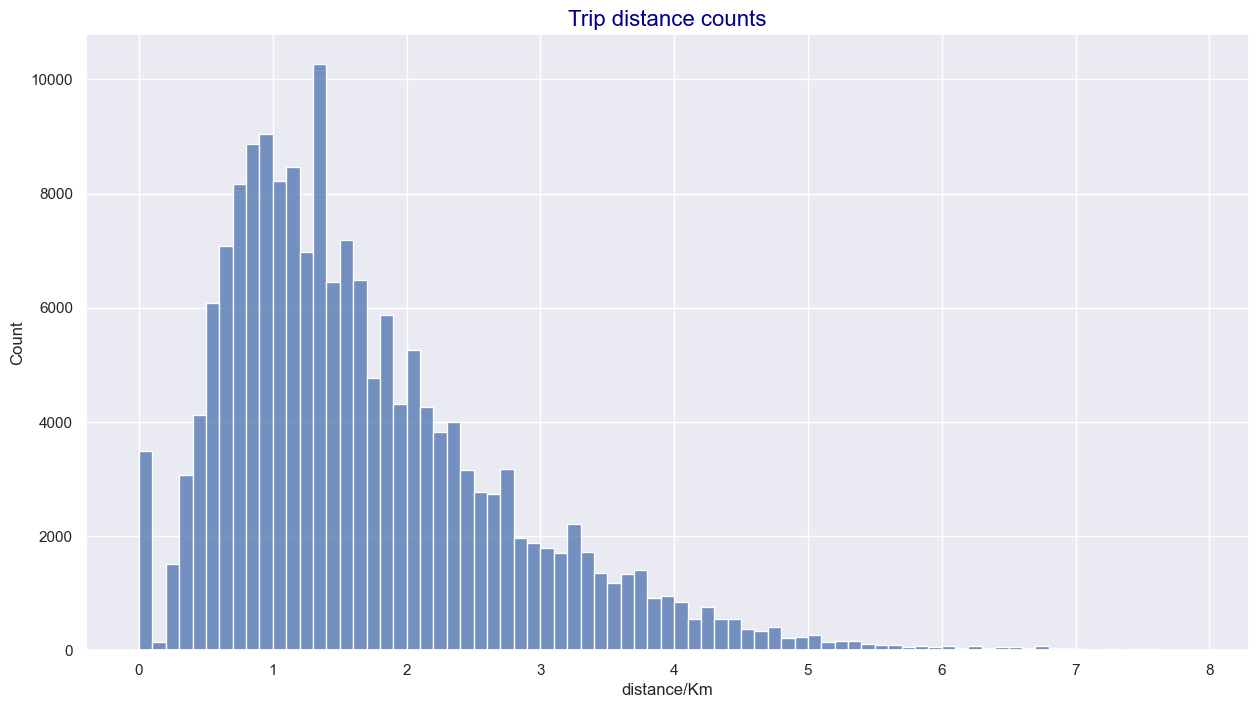

In [ ]:
plt.figure(figsize=(15,8))
bin = np.arange(0,8,.1)
sb.histplot(data=df,x='distance/Km',bins=bin).set_title(label='Trip distance counts', fontsize=16, color='darkblue')




The most number of trips occured at distances ranging from 0.4 km to 2.5 km between stations with the peak number of trips at around 1 km.<br> The more the distance increases between stations after 1.5 km the lesser the number of trips.

Text(0.5, 1.0, 'Daily Trip  counts')

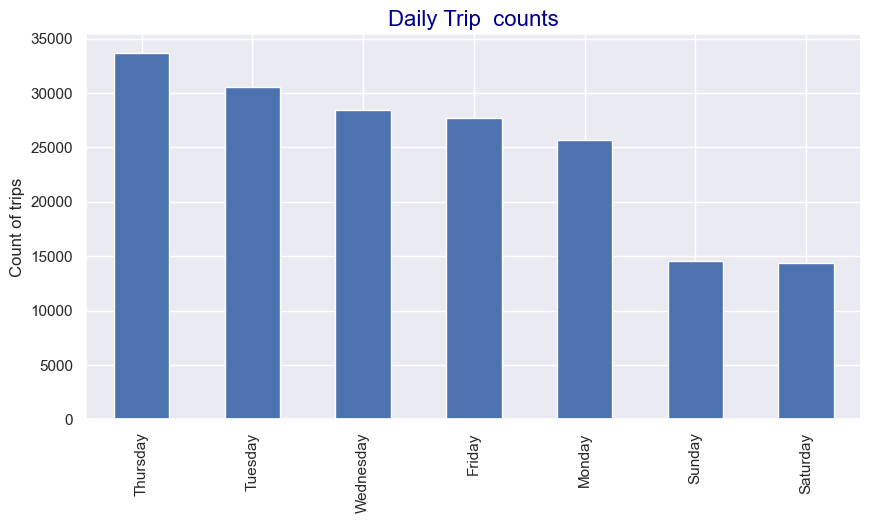

In [ ]:
df.start_day.value_counts().plot(figsize=(10,5),kind='bar', ylabel= 'Count of trips')
plt.title(label='Daily Trip  counts', fontsize=16, color='darkblue')


The most trips occur at Thursday then Tuesday. We can also see that the average number of daily trips at weekdays is almost double the daily trips at weekends.

Text(0.5, 1.0, 'Trip hourly counts')

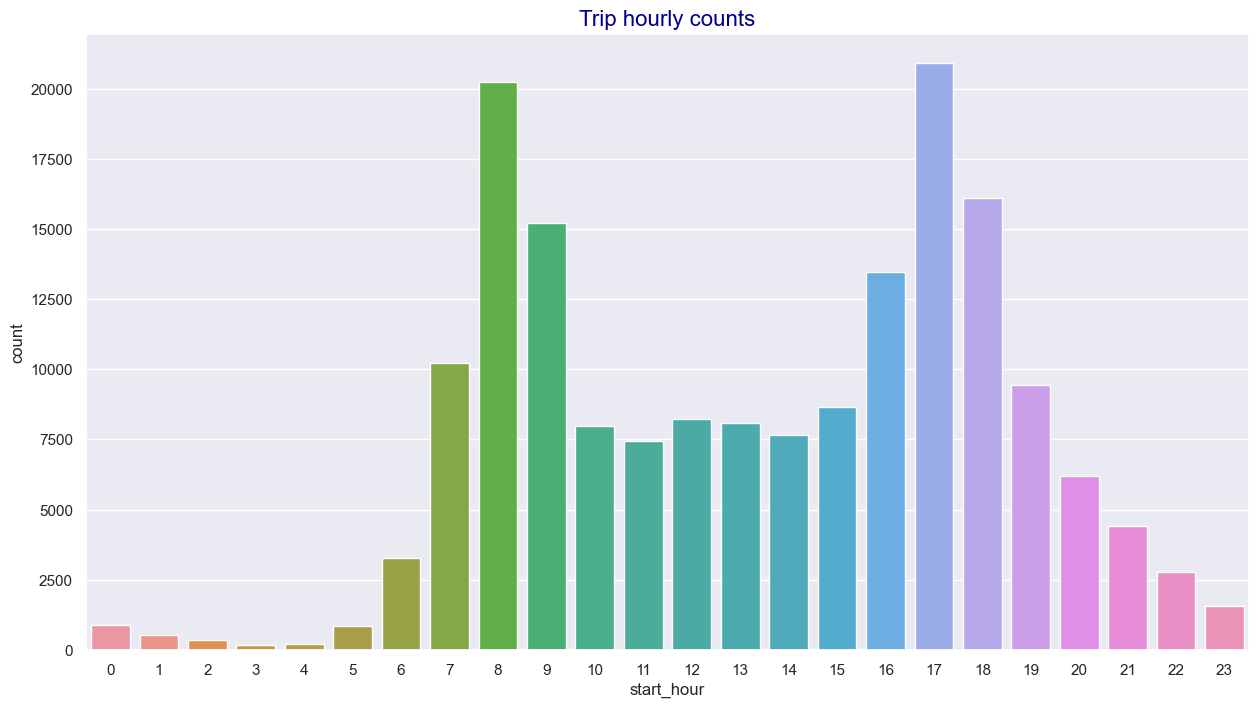

In [ ]:
plt.figure(figsize=(15,8))
sb.countplot(data=df, x='start_hour').set_title(label='Trip hourly counts', fontsize=16, color='darkblue')


The peak hours are at 8-9 AM and 5-6 PM

Average number of trips of most 20 used stations: 2180.4


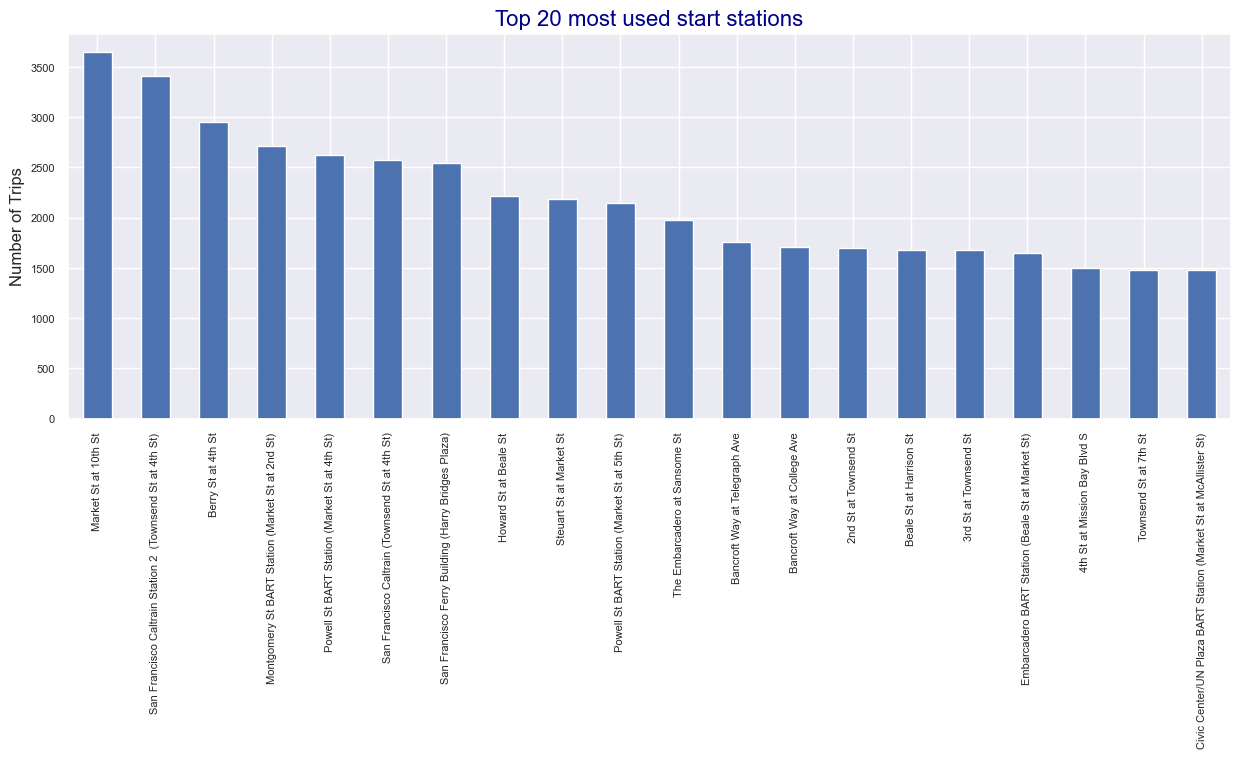

In [ ]:

df['start_station_name'].value_counts().head(20).plot(figsize=(15,5),kind='bar', ylabel='Number of Trips', fontsize= 8)
plt.title(label='Top 20 most used start stations', fontsize=16, color='darkblue')
print('Average number of trips of most 20 used stations:',df['start_station_name'].value_counts().head(20).mean())


The most used 20 stations range from about 1600 to 3700 trips with an average of around 2200 trips per station.


Average number of trips of least 20 used stations: 18.15


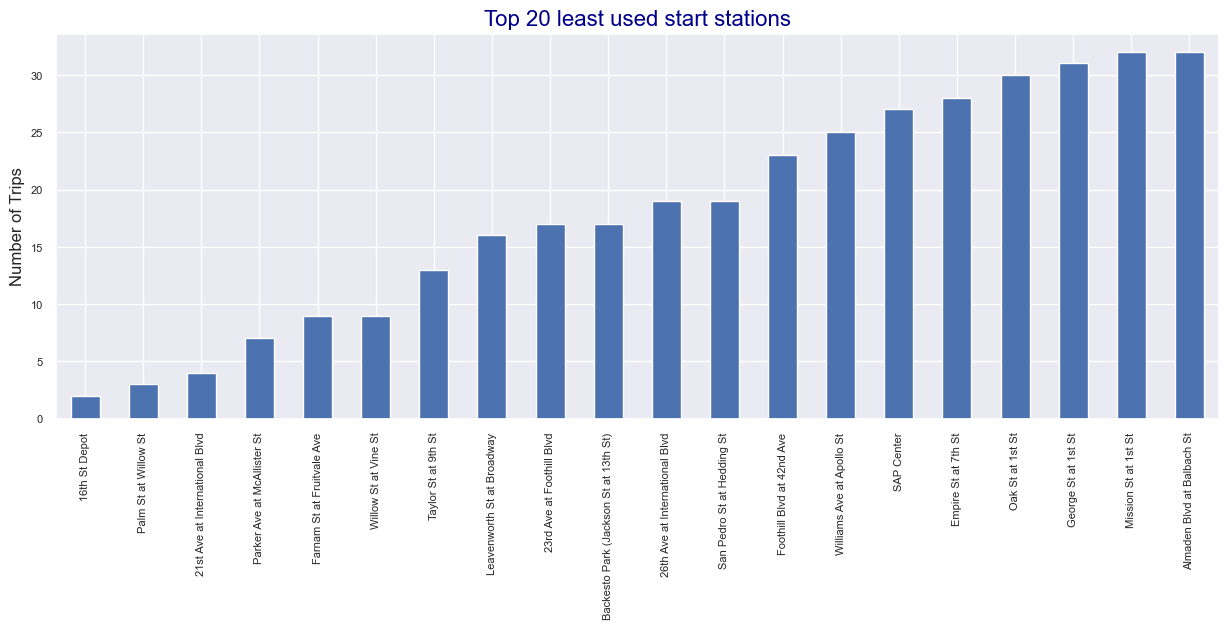

In [ ]:
df['start_station_name'].value_counts(ascending=True).head(20).plot(figsize= (15,5), kind='bar', ylabel='Number of Trips', fontsize= 8)
plt.title(label='Top 20 least used start stations', fontsize=16, color='darkblue')
print('Average number of trips of least 20 used stations:',df['start_station_name'].value_counts(ascending=True).head(20).mean())

The least used stations range from 2 to 32 trips with an average of 18 trips. There is so much difference in the number of trips between the most used stations and the least used stations.

Average number of trips of most 20 used stations: 18.15


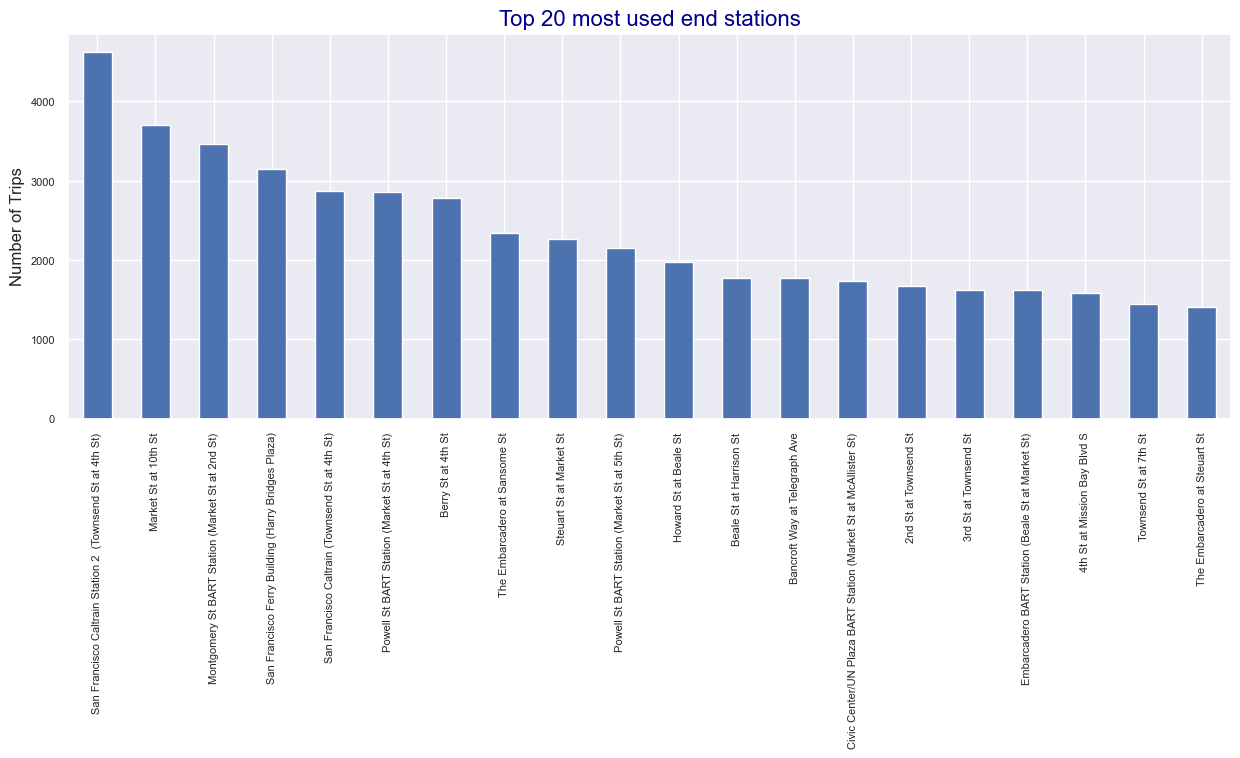

In [ ]:
df['end_station_name'].value_counts(ascending=False).head(20).plot(figsize= (15,5), kind='bar', ylabel='Number of Trips', fontsize= 8)
plt.title(label='Top 20 most used end stations', fontsize=16, color='darkblue')
print('Average number of trips of most 20 used stations:',df['start_station_name'].value_counts(ascending=True).head(20).mean())

In [ ]:
most_start_end =0
for station in df['start_station_name'].value_counts(ascending=False).head(20).keys():
     if station in df['end_station_name'].value_counts(ascending=False).head(20).keys():
          most_start_end = most_start_end + 1
     else:
          not_top20_end = station
     
print( most_start_end,'out of the top 20 most used start stations are also in the top 20 most used end stations.')
print('Top 20 start station that is not top 20 end station:',not_top20_end)



19 out of the top 20 most used start stations are also in the top 20 most used end stations.
Top 20 start station that is not top 20 end station: Bancroft Way at College Ave


In [ ]:
rank= df['end_station_name'].value_counts(ascending=False).head(35).keys()
rank =rank.tolist()
print('The rank of the Bancroft Way at College Ave at the most:',rank.index('Bancroft Way at College Ave'))

The rank of the Bancroft Way at College Ave: 31


We can coclude that the most used start stations are most of the time also the most used end stations.<br> The only station which was in the top 20 start stations list and not in the end stations list was (The rank of the Bancroft Way at College Ave). Its rank was found to be 31 in the end station most used list.

Average number of trips of least 20 used stations: 18.15


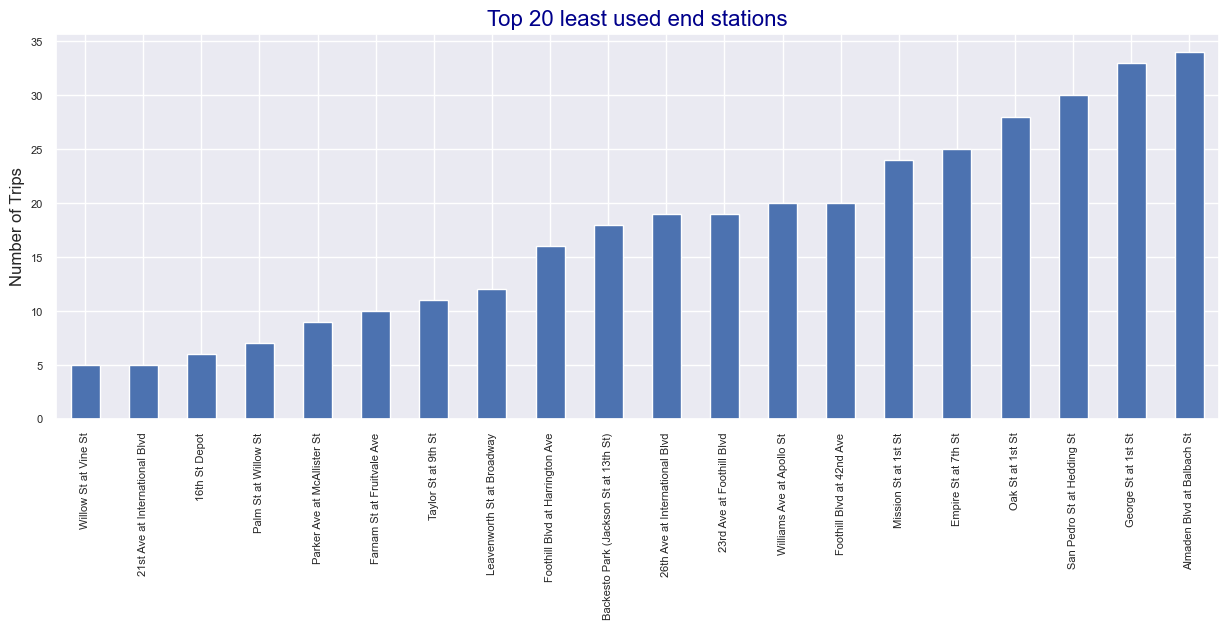

In [ ]:
df['end_station_name'].value_counts(ascending=True).head(20).plot(figsize= (15,5), kind='bar',title='Top 20 least used end stations', ylabel='Number of Trips', fontsize= 8)
plt.title(label='Top 20 least used end stations', fontsize=16, color='darkblue')
print('Average number of trips of least 20 used stations:',df['start_station_name'].value_counts(ascending=True).head(20).mean())

In [ ]:
least_start_end =0
for station in df['start_station_name'].value_counts(ascending=True).head(20).keys():
     if station in df['end_station_name'].value_counts(ascending=True).head(20).keys():
          least_start_end = least_start_end + 1
          
     
print( least_start_end,'out of the top 20 least used start stations are also in the top 20 least used end stations.')

19 out of the top 20 least used start stations are also in the top 20 least used end stations.


From the above analysis, we can see that the most used start stations are also the most used as end stations.<br>
The same also applies to the least used start and end stations. The least used start stations are also the least used as end stations.

Text(0.5, 1.0, 'Trip Age Count')

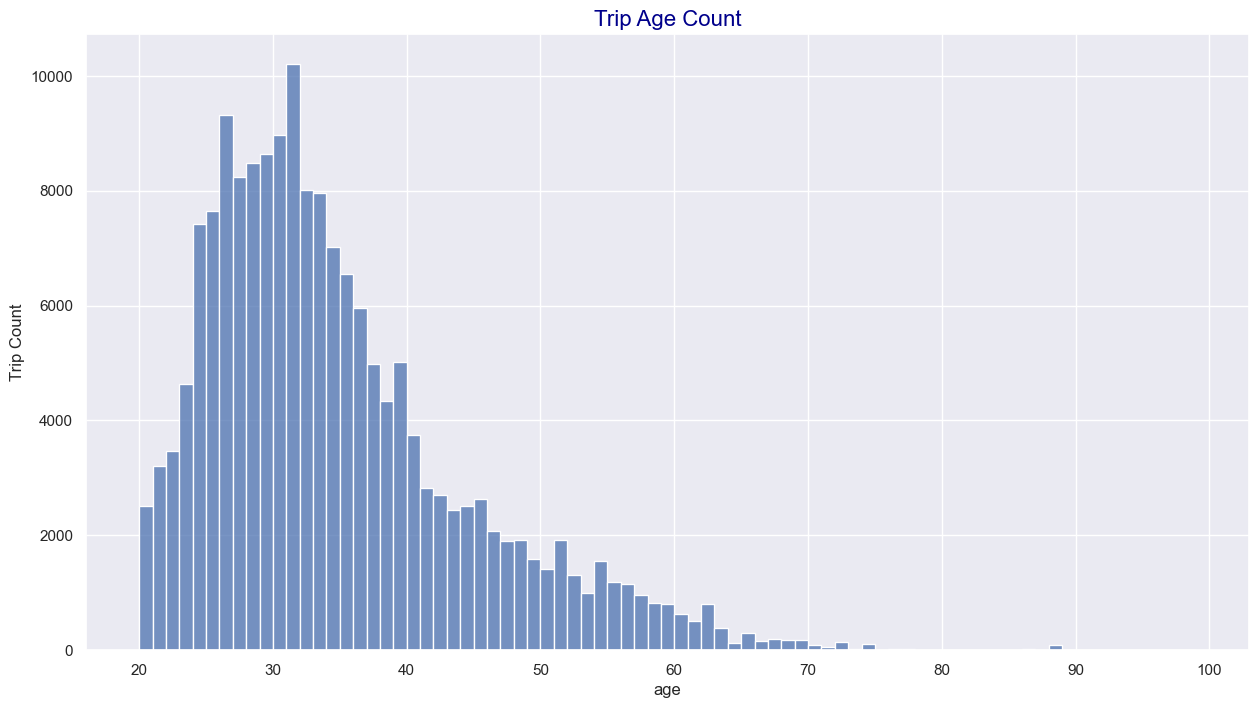

In [ ]:
plt.figure(figsize=(15,8))
age_count =sb.histplot(data=df, x='age', bins=np.arange(20,100,1))
age_count.set(ylabel='Trip Count')
plt.title(label='Trip Age Count', fontsize=16, color='darkblue')



Most of the bikeshare users lie in the range from 20 to 45 years old . The peak age is  approximately at the end of the 20's and beginnig of the 30's.

<AxesSubplot:title={'center':'Percentage of trips'}, ylabel='member_gender'>

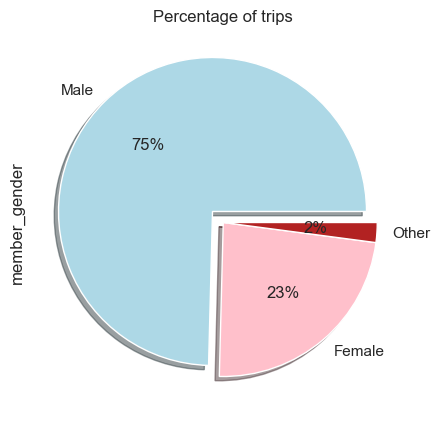

In [ ]:

df['member_gender'].value_counts().plot( kind='pie',figsize= (10,5), explode= [0.1,0,0], autopct='%1.0f%%', 
shadow=True, colors= ['lightblue','pink','firebrick'], title= 'Percentage of trips')

<AxesSubplot:title={'center':'Percentage of trips'}, ylabel='user_type'>

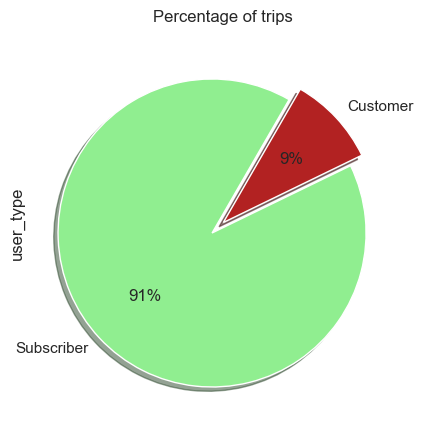

In [ ]:

df['user_type'].value_counts().plot( kind='pie',figsize= (10,5), explode= [0.1,0], autopct='%1.0f%%', startangle= 60, 
shadow=True, colors= ['lightgreen','firebrick'], title= 'Percentage of trips')

In [ ]:
print('Most 10 used bikes:\n',df['bike_id'].value_counts().head(10))
print('-'*50)
print('Least 10 used bikes:\n',df['bike_id'].value_counts(ascending=True).head(90))  

Most 10 used bikes:
 4794    179
4814    172
5175    167
4450    166
5145    165
5482    164
4422    163
4956    162
4812    162
4834    162
Name: bike_id, dtype: int64
--------------------------------------------------
Least 10 used bikes:
 5067    1
540     1
3002    1
3209    1
5720    1
       ..
5806    1
398     1
2375    2
1227    2
5674    2
Name: bike_id, Length: 90, dtype: int64


In [ ]:
bike_counts = pd.DataFrame(df['bike_id'].value_counts(ascending=True).values,columns=['bike_trips'])
bike_counts

,bike_trips
0,1
1,1
2,1
3,1
4,1
...,...
4602,165
4603,166
4604,167
4605,172


Text(0.5, 1.0, 'Bikes Number of Trips')

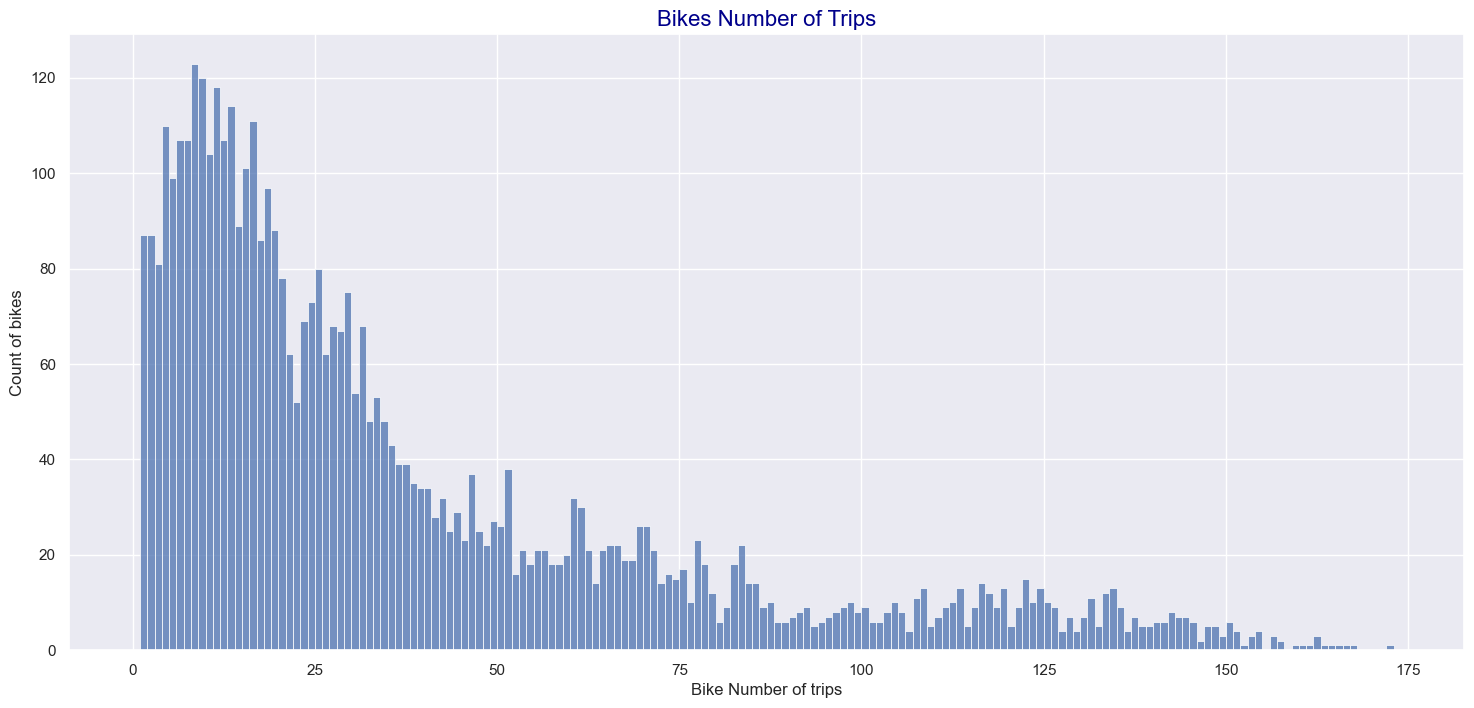

In [ ]:
plt.figure(figsize=(18,8))
btc= sb.histplot(data=bike_counts, x='bike_trips', bins=np.arange(0,175,1))
btc.set(xlabel= 'Bike Number of trips', ylabel= 'Count of bikes')
plt.title(label='Bikes Number of Trips', fontsize=16, color='darkblue')


In [ ]:
#Find the percentage of the bikes with less than 50 trips.
(bike_counts.query("bike_trips<50").count()/bike_counts.count())*100

bike_trips    73.041025
dtype: float64

 There are few number of bikes which have very high number of trips, while the majority of the bikes have less than 50 trips (almost 75% of the bikes).<br> This suggests that most of the bikes are not regularly used and there are a few number of bikes that are always used. The highest bike counts (>200 counts) occured in the ranged of 6-14 trips.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
df.head()

,duration,duration_sec,start_time,start_day,start_hour,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip,distance/Km
0,0 days 14:29:45,52185,2019-02-28 17:32:10.145,Thursday,17,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,35.0,Male,No,0.54
1,0 days 17:10:54,61854,2019-02-28 12:13:13.218,Thursday,12,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,47.0,Male,No,2.70
2,0 days 10:08:10,36490,2019-02-28 17:54:26.010,Thursday,17,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,30.0,Other,No,0.26
3,0 days 00:26:25,1585,2019-02-28 23:54:18.549,Thursday,23,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,45.0,Male,Yes,2.41
4,0 days 00:29:53,1793,2019-02-28 23:49:58.632,Thursday,23,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,60.0,Male,No,3.33


Text(0.5, 1.0, 'Average Trip Distance By Gender')

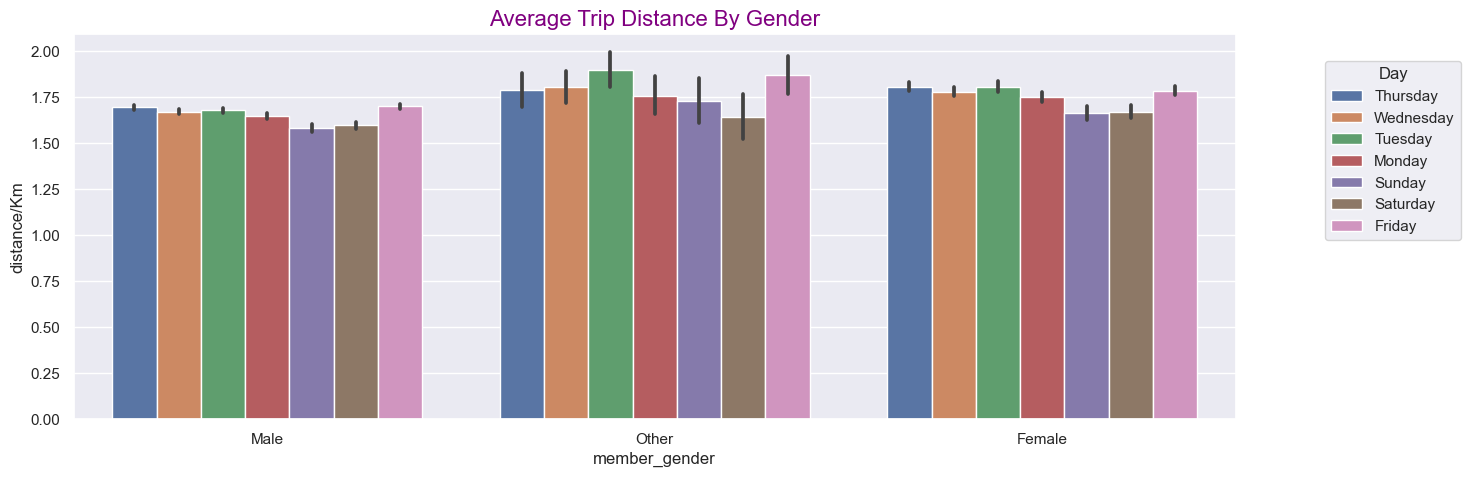

In [ ]:
plt.figure(figsize=(15,5))
sb.barplot(data=df, x='member_gender', y= 'distance/Km', hue='start_day')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, .95), title='Day')
plt.title(label='Average Trip Distance By Gender', fontsize=16, color='purple')



The average distance covered by each gender is relatively close to each other with approximately 1.7 km per trip.

Text(0.5, 1.0, 'Average Trip Duration By Gender')

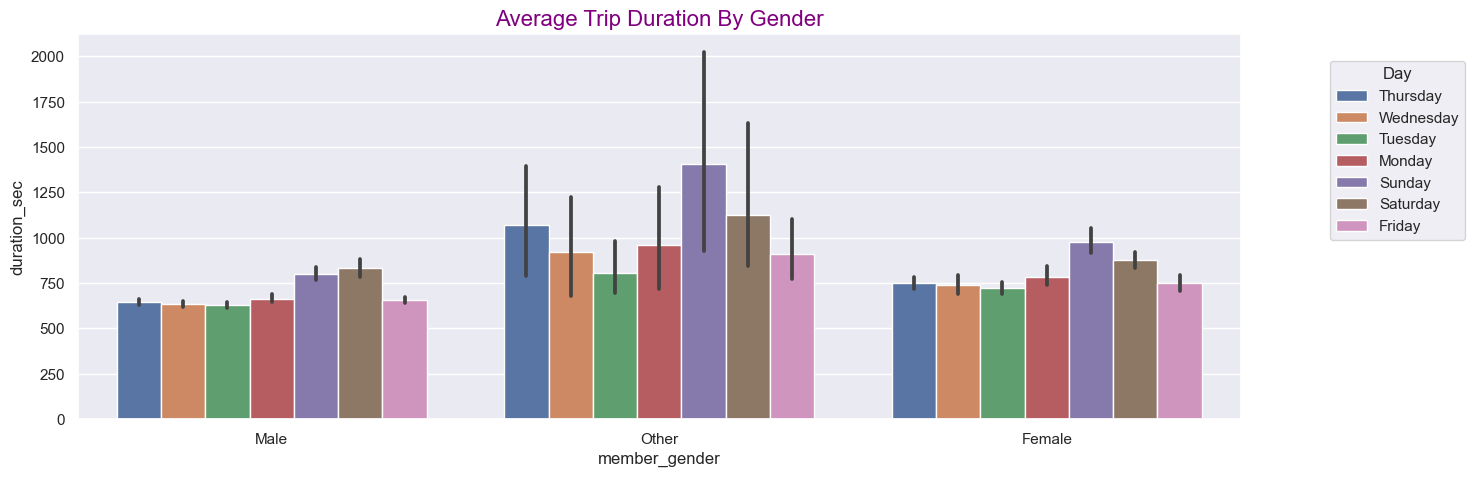

In [ ]:
plt.figure(figsize=(15,5))
sb.barplot(data=df, x='member_gender', y= 'duration_sec', hue='start_day')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, .95), title='Day')
plt.title(label='Average Trip Duration By Gender', fontsize=16, color='purple')


All genders spent more times on the bikes during sundays and saturdays. The other gender spent overall more time throughout the week.

Text(0.5, 1.0, 'User Trip Count')

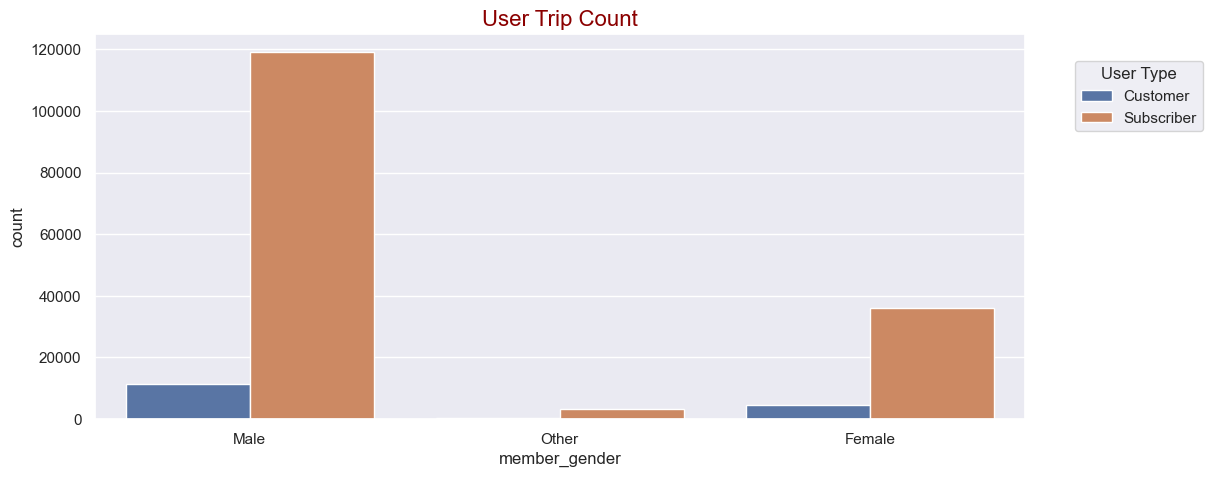

In [ ]:
plt.figure(figsize=(12,5))
sb.countplot(data=df, x='member_gender', hue='user_type')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, .95), title='User Type')
plt.title(label='User Trip Count', fontsize=16, color='darkred')


Males are the most subscribers and most customers.

Text(0.5, 1.0, 'User Average Daily Trips Count ')

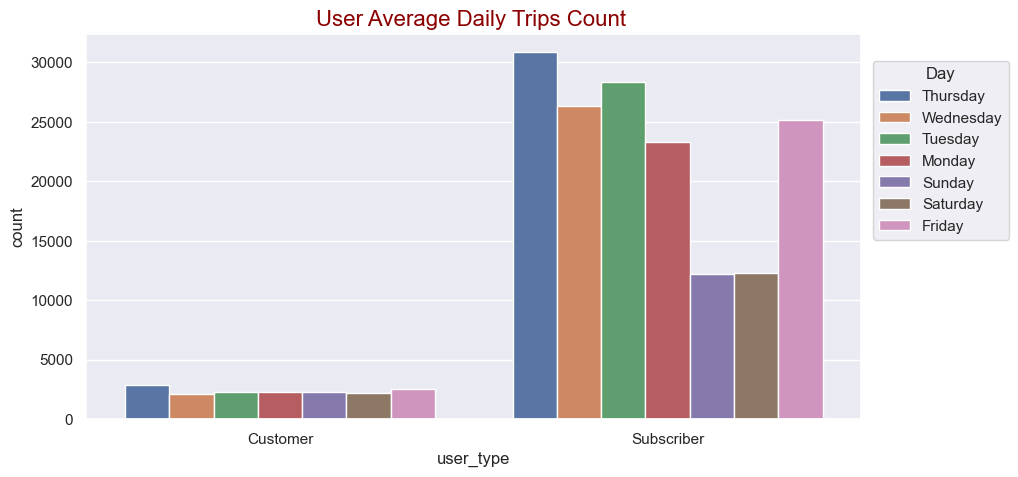

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x='user_type', hue='start_day')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, .95), title='Day')
plt.title(label='User Average Daily Trips Count ', fontsize=16, color='darkred')

Customers generally have trips throughout the week. Subscriber trips, however, decrease in saturdays and sundays almost the half compared to other days.

Text(0.5, 1.0, 'User Average Daily Trips Duration')

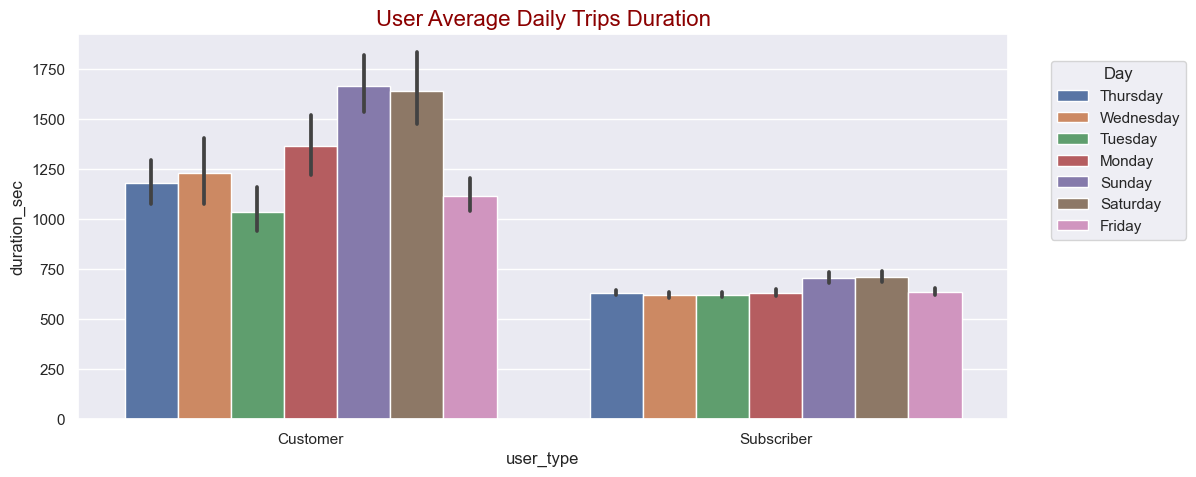

In [ ]:
plt.figure(figsize=(12,5))
sb.barplot(data=df, x='user_type', y='duration_sec', hue='start_day')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, .95), title='Day')
plt.title(label='User Average Daily Trips Duration', fontsize=16, color='darkred')

This is was a bit surprising, customers have spent almost double the time that subscribers spent on their trips.<br> This can be because subscribers use the bikes on a daily basis going to their work place so they don't spend much time.<br> Unlike customers, who might be trying the bike ride for the first time so they take more time to try it out.

Text(0.5, 1.0, 'User Average Daily Trips Distance')

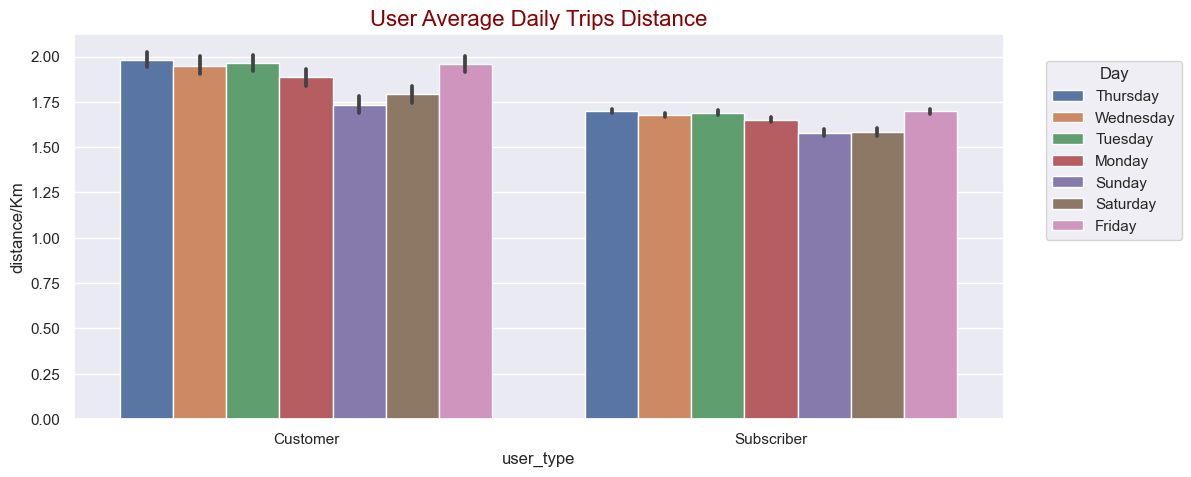

In [ ]:
plt.figure(figsize=(12,5))
sb.barplot(data=df, x='user_type', y='distance/Km', hue='start_day')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, .95), title='Day')
plt.title(label='User Average Daily Trips Distance', fontsize=16, color='darkred')

Generally customers cover slightly more distance per trip than subscribers.

Text(0.5, 1.0, 'Duration vs Distance  ')

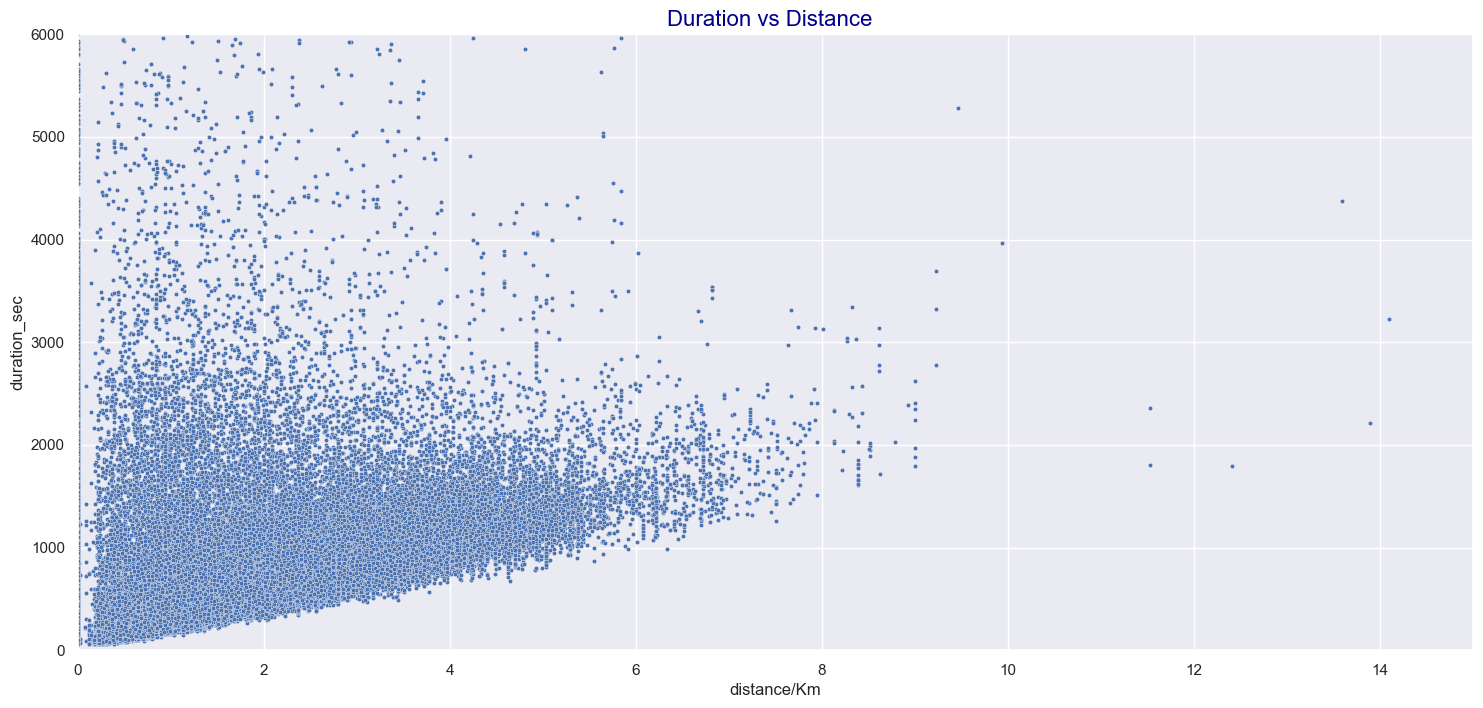

In [ ]:
plt.figure(figsize=(18,8))
sb.scatterplot(data=df, x='distance/Km', y= 'duration_sec', s=10).set(ylim=(0,6000), xlim=(0,15))
plt.title(label='Duration vs Distance  ', fontsize=16, color='darkblue')


There is gnerally a proportional increase in duration as traveled distance increases between stations until a certain limit which is about 8 Km. After that, there is no obvious relation between the duration spent and distance traveled. Generally, very little trips that exceed the 8km distance. We can also see that there is alot of trips where distance is small but the duration is high.

As expected, the older the age the less number of trips with less distance covered.

Text(0.5, 1.0, 'Duration vs member_age')

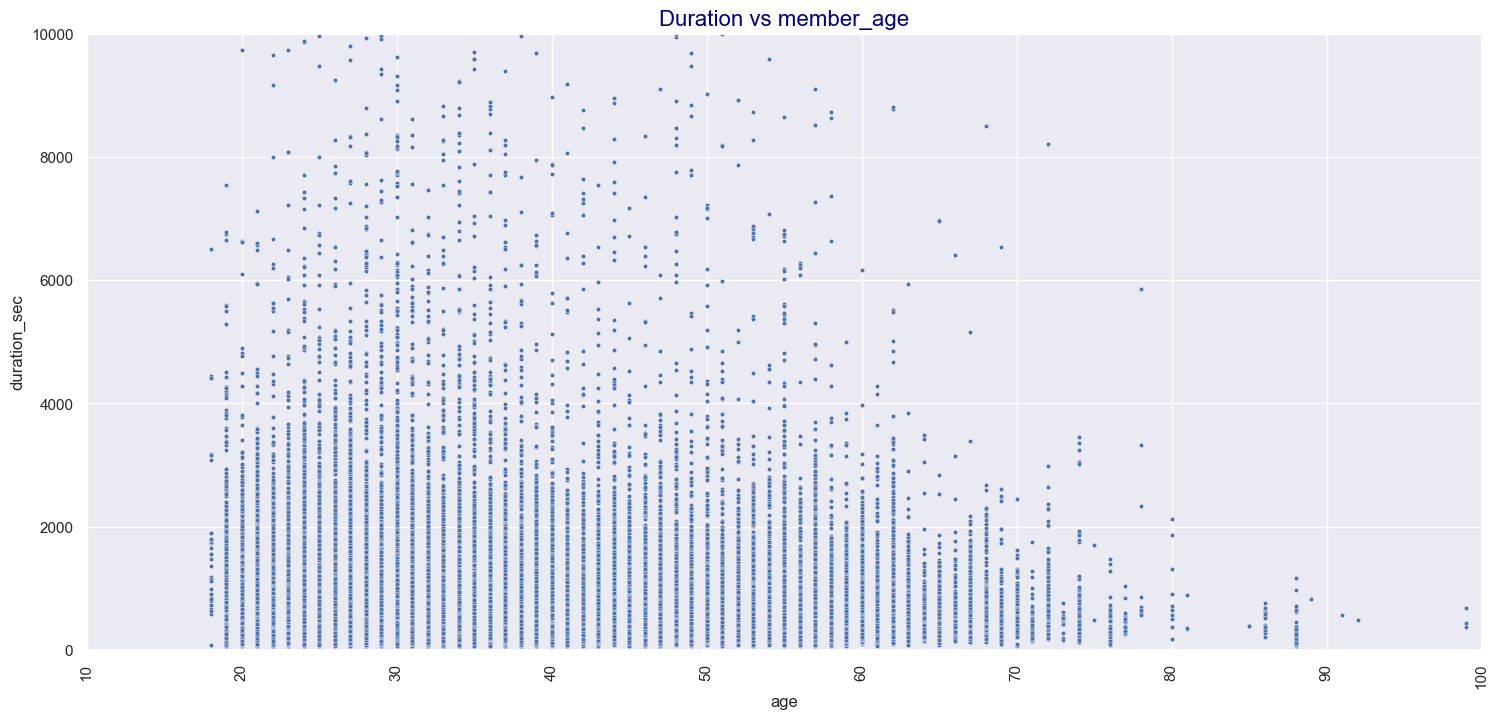

In [ ]:
plt.figure(figsize=(18,8))
sb.scatterplot(data=df, x='age', y= 'duration_sec', s=10).set(ylim=(0,10000), xlim=(10,100))
plt.xticks(rotation=90)
plt.title(label='Duration vs member_age', fontsize=16, color='darkblue')


 The older the age after 30 years, the lesser the number of trips with less duration spent. Also, it can be clearly seen that number of high ouliers in duration disappears with age.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?




## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1.0, 'Weekly Trip Count Map')

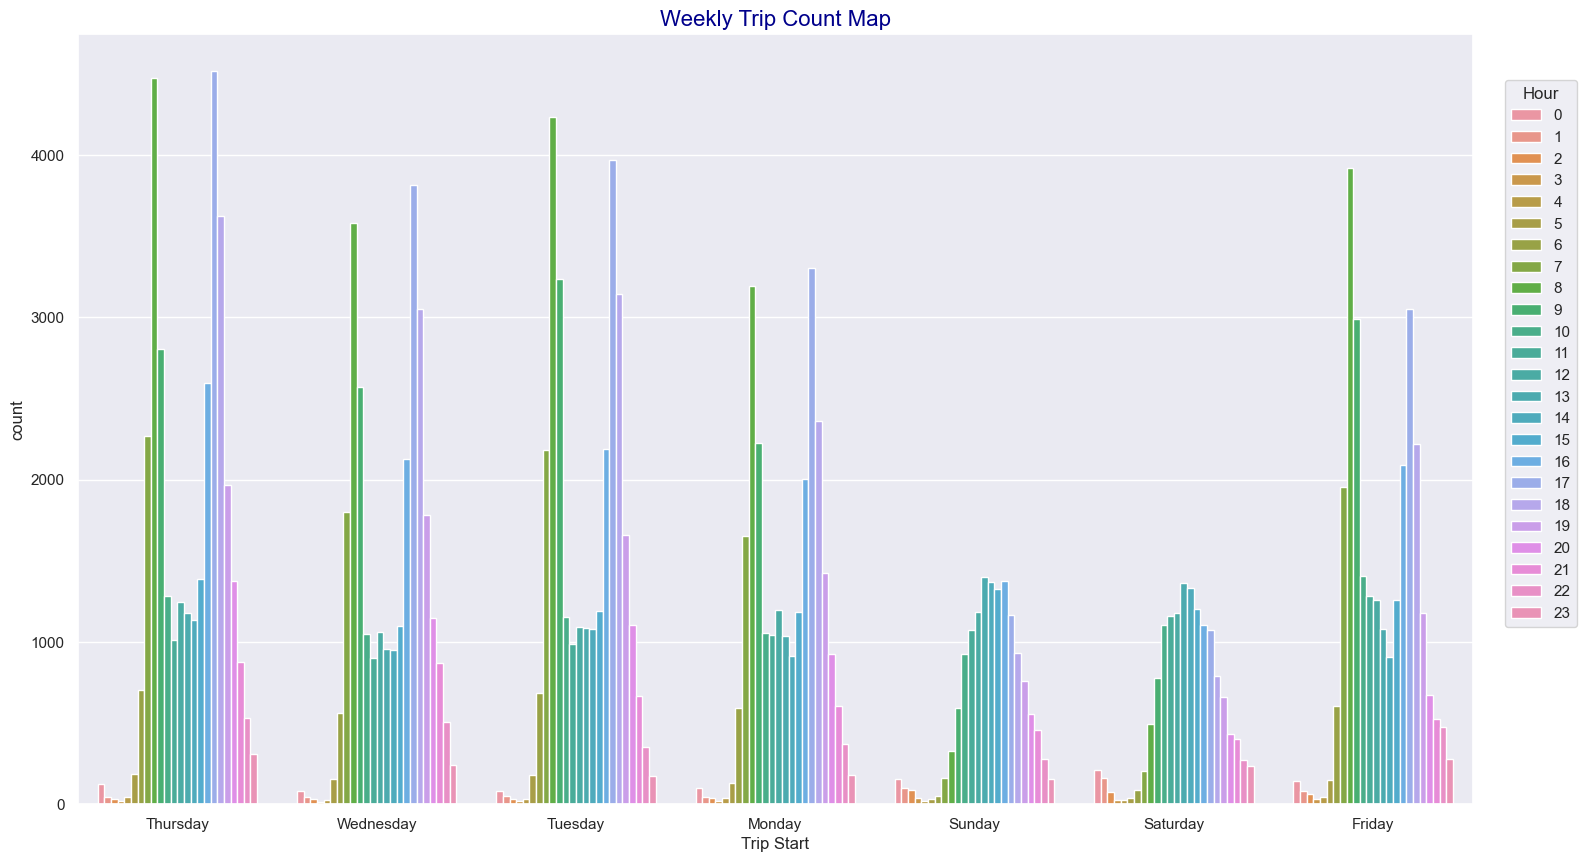

In [ ]:
plt.figure(figsize=(18,10))
sb.countplot(data=df, x='start_day', hue= 'start_hour').set( xlabel='Trip Start')
plt.legend( loc="upper right", bbox_to_anchor=(1.08, .95), title='Hour')
plt.title(label='Weekly Trip Count Map', fontsize=16, color='darkblue')


As seen previously, the trip counts peaks two times each day which is atround 8 am and 5 pm.<br> This graph further analyzes trips for each day which shows that the peak hours in the sundays and saturdays is different from the other days of the week.<br>
There is only one peak hour at around 1-4 pm in weekends.

Text(0.5, 1.0, 'Average Trip Duration Weekly Map')

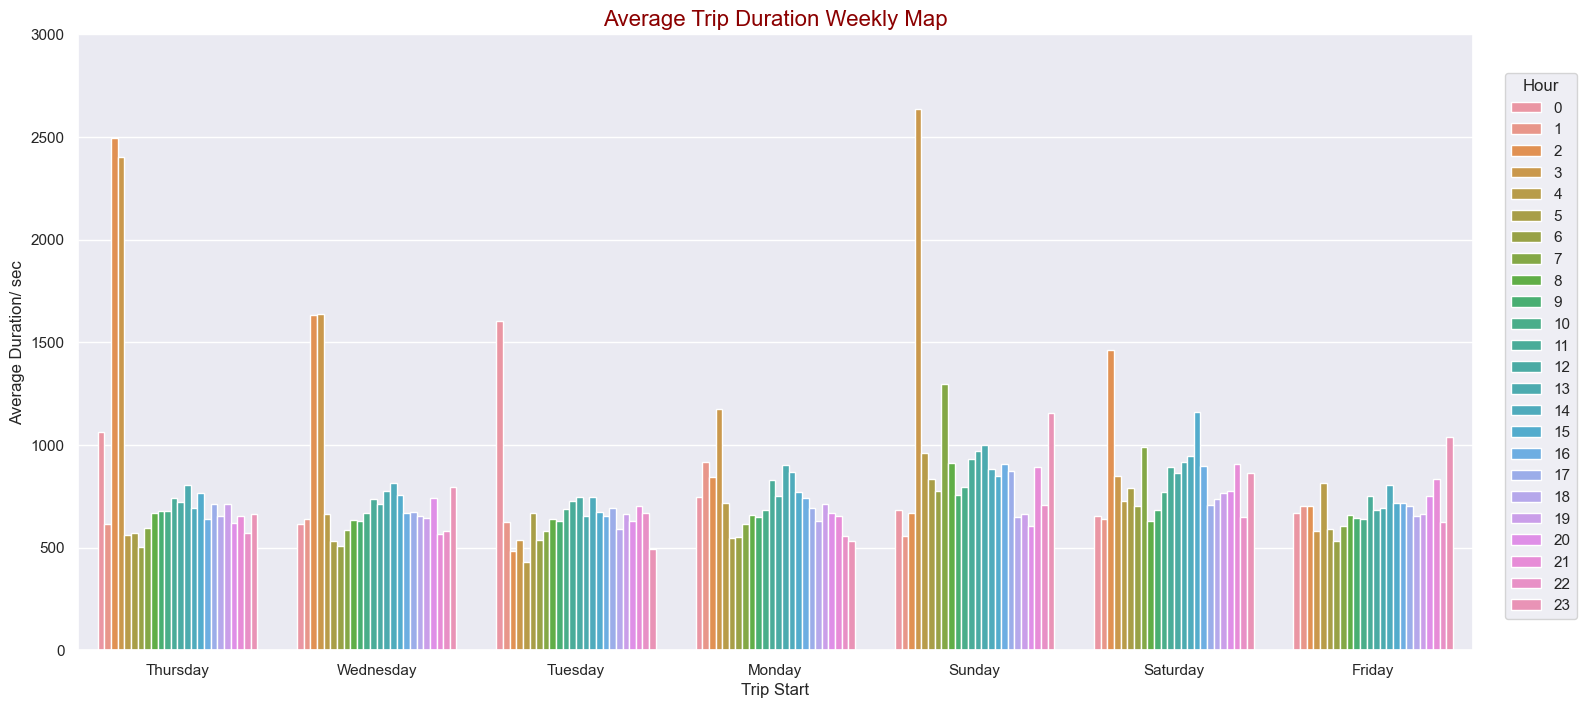

In [ ]:
plt.figure(figsize=(18,8))
sb.barplot(data=df, x='start_day',y='duration_sec',hue='start_hour',ci=None).set( ylim=(0,3000),xlabel='Trip Start', ylabel='Average Duration/ sec')
plt.legend( loc="upper right", bbox_to_anchor=(1.08, .95), title='Hour')
plt.title(label='Average Trip Duration Weekly Map', fontsize=16, color='darkred')

Generally the trips with the most duration occurs at the first hours of the day. There is no specific day in which long duration trips occurs but for some reason friday and monday are the days in which there is no high peaks duration trip occurs.

Text(0.5, 1.0, 'Average Trip Distance Weekly Map')

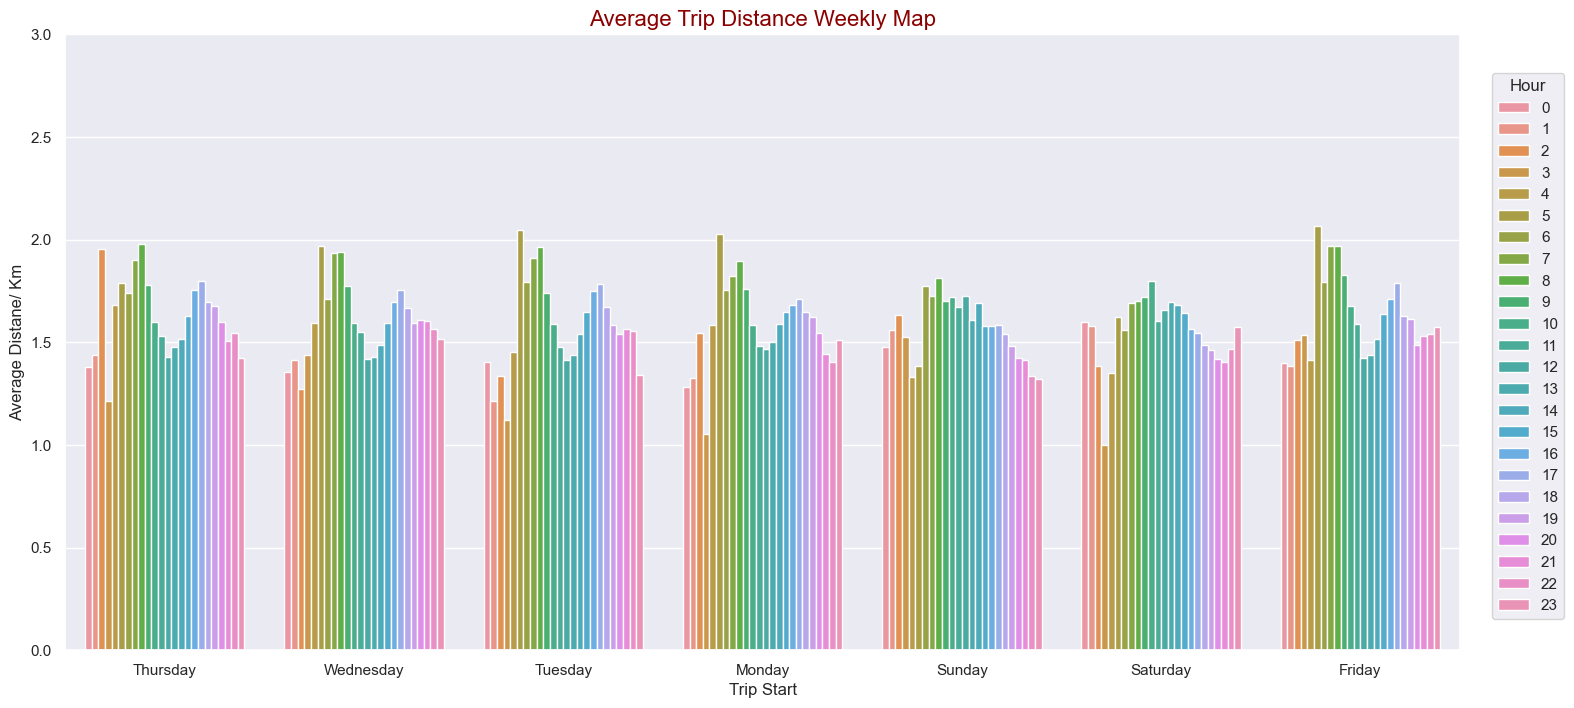

In [ ]:
plt.figure(figsize=(18,8))
sb.barplot(data=df, x='start_day',y='distance/Km',hue='start_hour',ci=None).set( ylim=(0,3), xlabel='Trip Start',ylabel='Average Distane/ Km')
plt.legend( loc="upper right", bbox_to_anchor=(1.08, .95), title='Hour')
plt.title(label='Average Trip Distance Weekly Map', fontsize=16, color='darkred')


Daily distance covered between stations are almost around an average of 1.5 Km per trip. Usually trips that start in the early morning cover more distance than trips starting later in the day.

In [ ]:
top_20s=df[df['start_station_name'].isin(df['start_station_name'].value_counts().head(20).keys())]

Text(0.5, 1.0, 'Trip Distances By Top20 Used Stations')

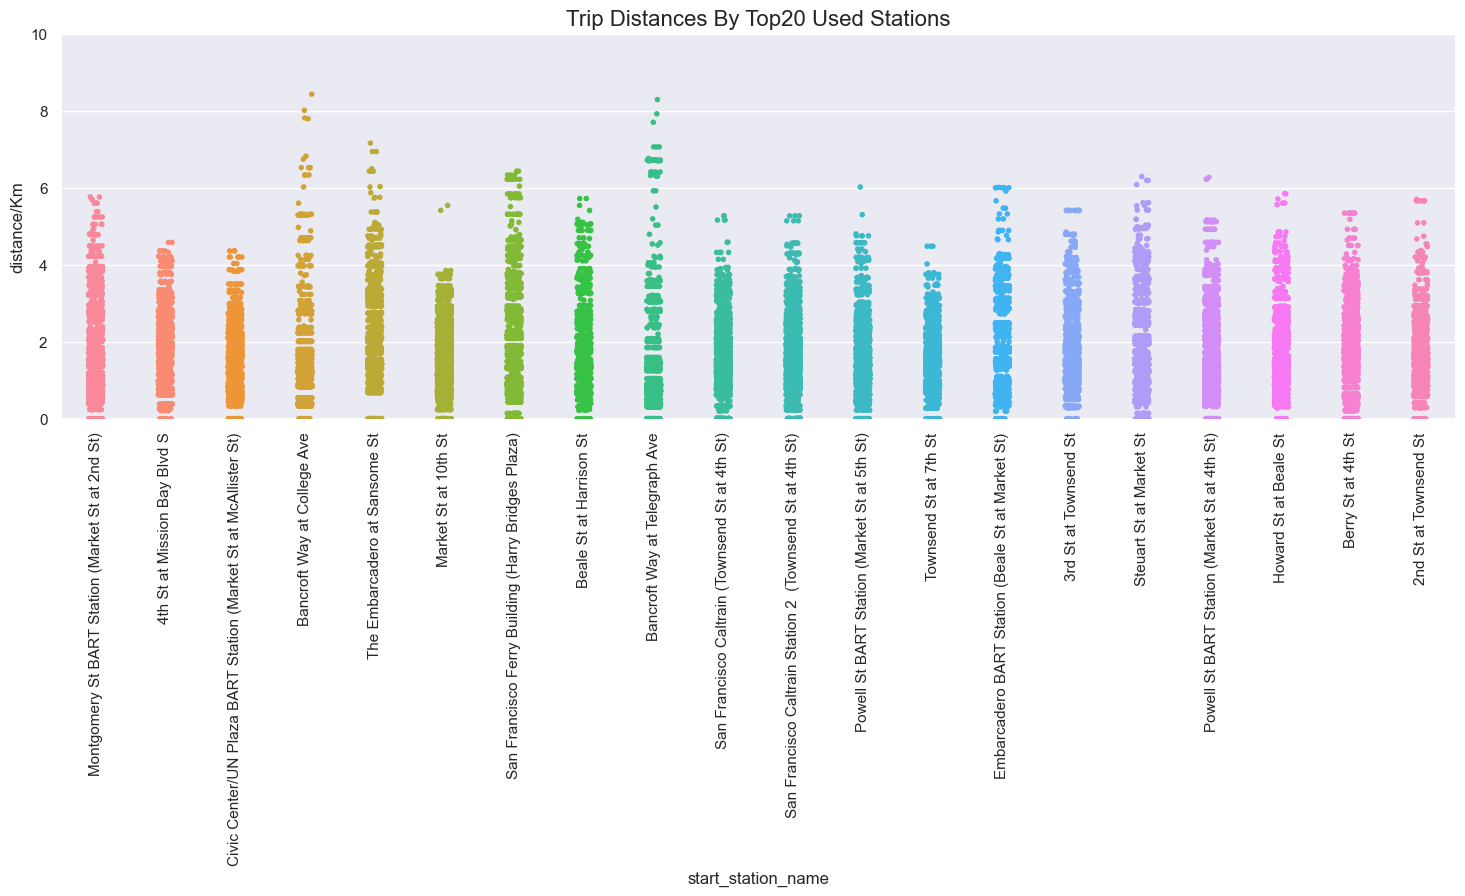

In [ ]:
plt.figure(figsize=(18,5))
sb.stripplot(data=top_20s, x='start_station_name', y= 'distance/Km', s=4).set(ylim=(0,10))
plt.xticks(rotation=90)
plt.title(label='Trip Distances By Top20 Used Stations', fontsize=16)


This graph shows the distance of the trips of the most 20 used start stations.<br> We can see that the 2 stations with the highest distant trips occuring are 'Bancroft Way at College Ave' and  'Bancroft Way at Telegraph Ave'.

Text(0.5, 1.0, 'Trip Durations By Top 20 Used Stations')

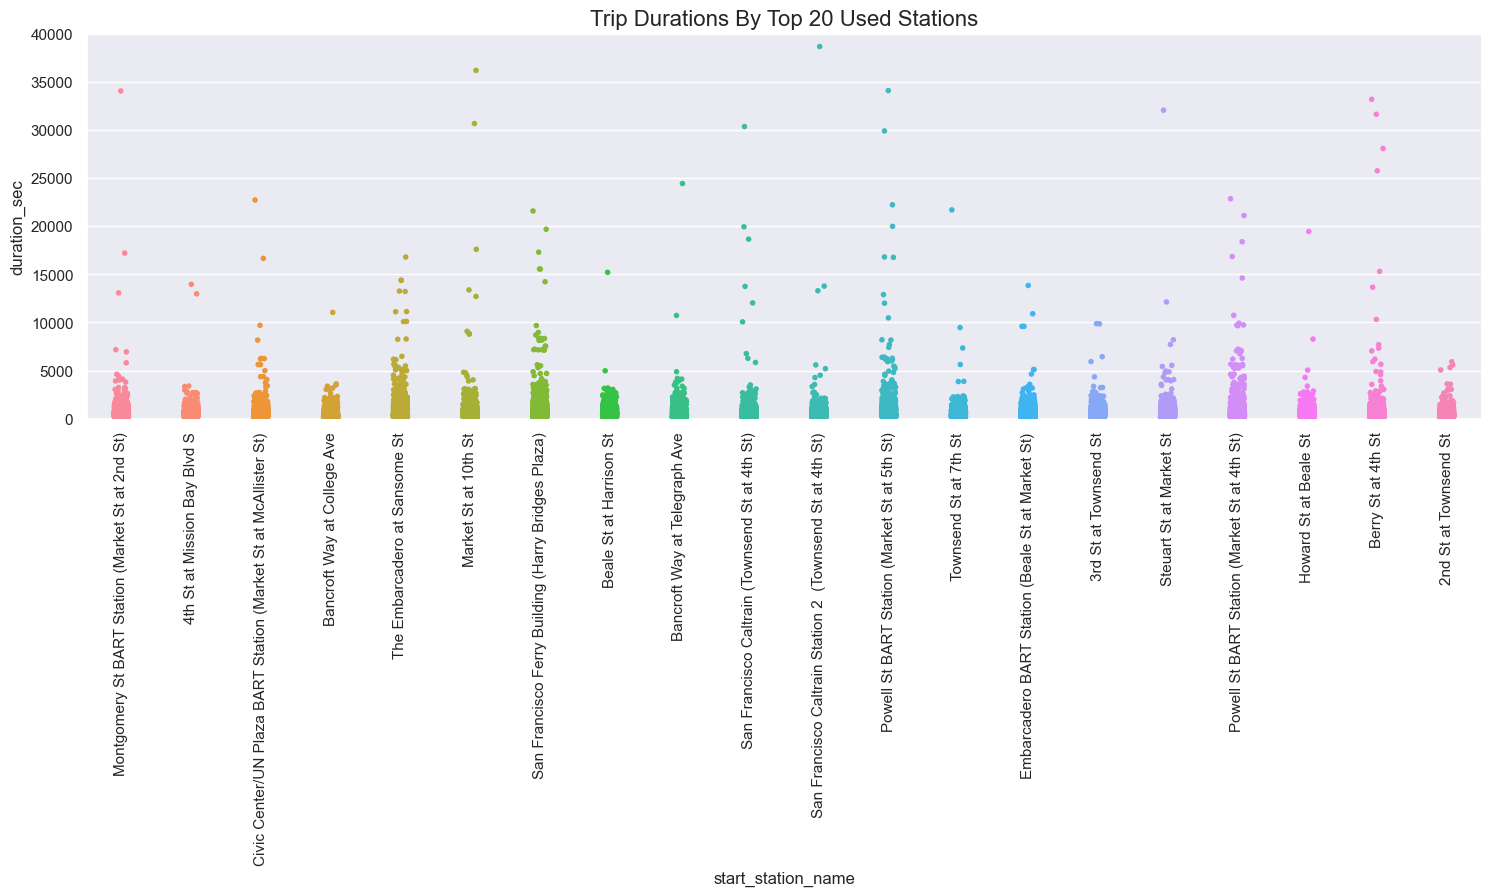

In [ ]:
sb.set(style="darkgrid")
plt.figure(figsize=(18,5))
sb.stripplot(data=top_20s, x='start_station_name', y= 'duration_sec', s=4).set(title='Distance vs member_age',ylim=(0,40000),)
plt.xticks(rotation=90)
plt.title(label='Trip Durations By Top 20 Used Stations', fontsize=16)


We can see that there are some number of high duration outliers in most of the stations. However, some stations such as 'Powell St BART Station (Market St at 4th St)' clearly have much higher and more frequent outliers than most other stations.

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


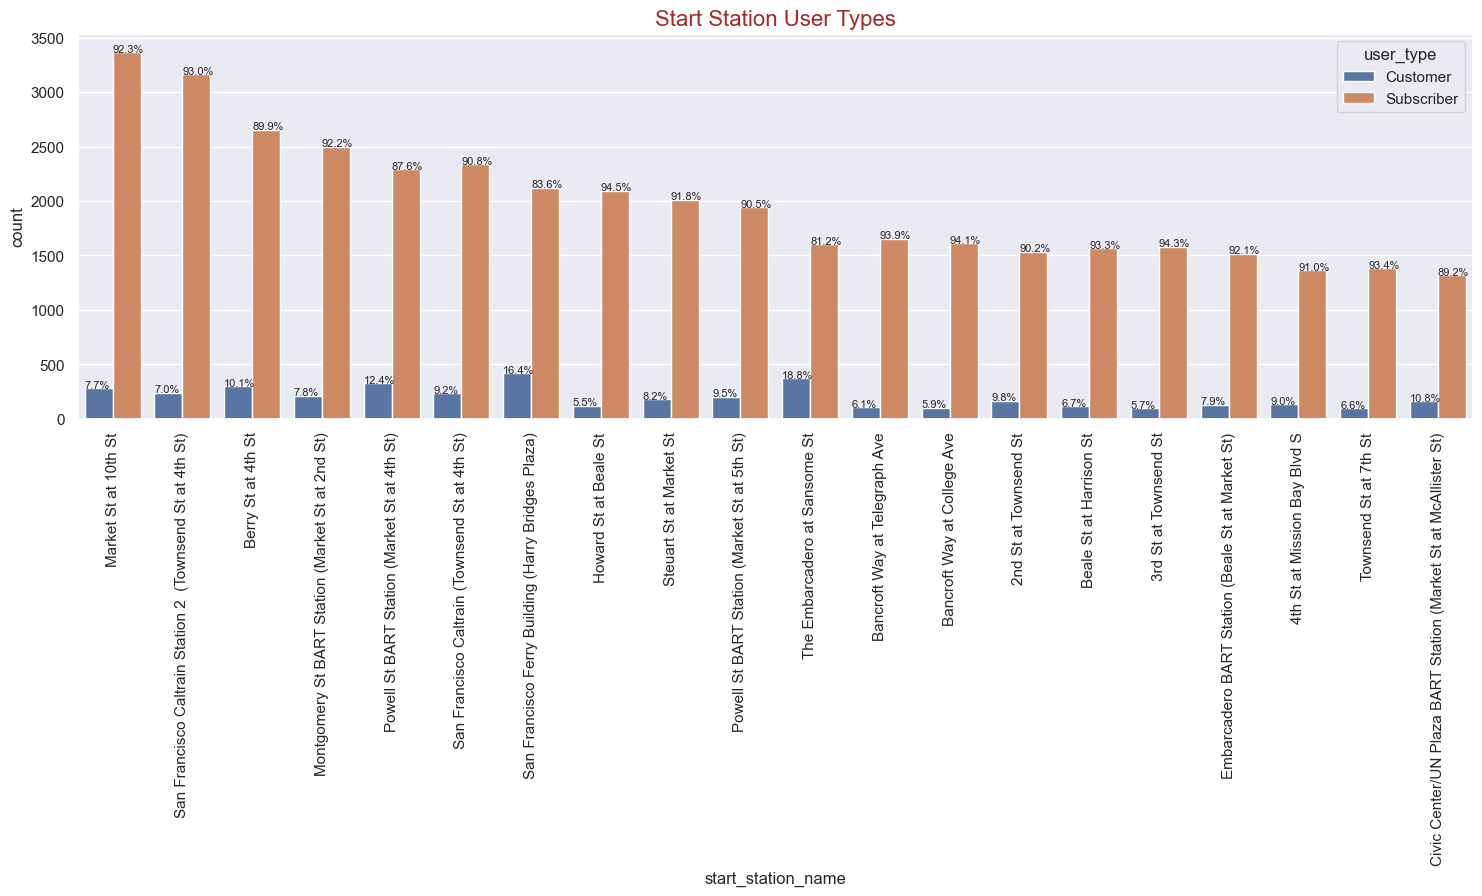

In [ ]:
plt.figure(figsize=(18,5))
ax = sb.countplot('start_station_name',data=top_20s, hue='user_type', order= top_20s['start_station_name'].value_counts().keys())
plt.xticks(rotation=90)
plt.title(label='Start Station User Types', fontsize=16, color='Brown')


def with_hue(ax, feature, Number_of_categories, hue_categories):
    # This is a function to put percentage labels to the bars in the plot. 
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 8)

with_hue(ax,top_20s.start_station_name,20,2)

This graph shows the user types for the top 20 most used stations. Most of the stations have much higer number of subscribers than customers.<br> In 'San Francisco Ferry Building(Hary Bridges Plaza) and 'The Embarcadero at Sansome St' the percentage of customers is slightly highere than rest of the stations.

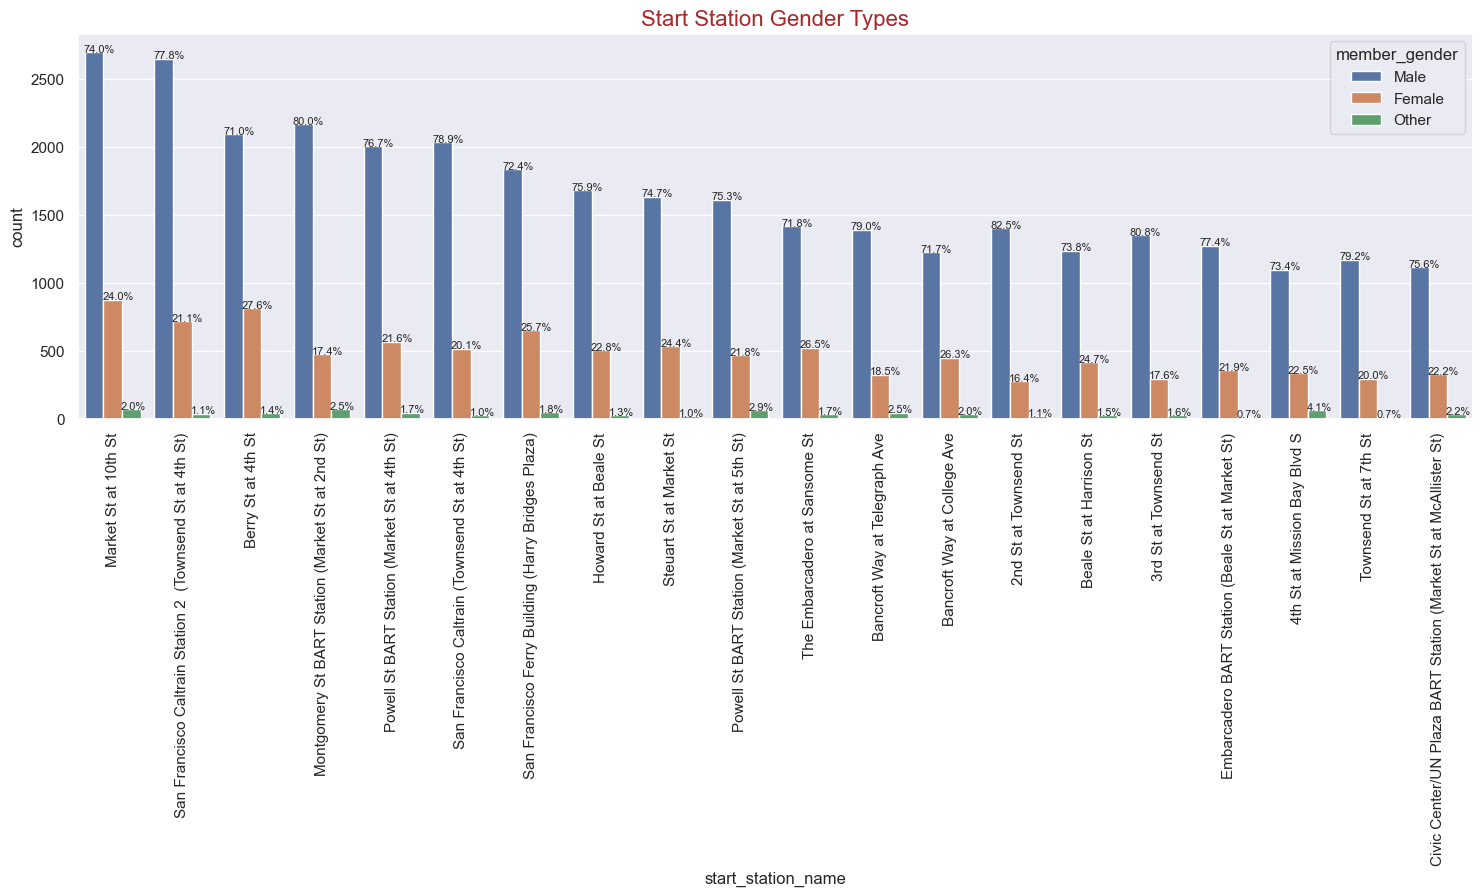

In [ ]:
plt.figure(figsize=(18,5))
ax = sb.countplot(x='start_station_name',data=top_20s, hue='member_gender', order= top_20s['start_station_name'].value_counts().keys())
plt.xticks(rotation=90)
plt.title(label='Start Station Gender Types', fontsize=16, color='Brown')


def with_hue(ax, feature, Number_of_categories, hue_categories):
    # This is a function to put percentage labels to the bars in the plot. 
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 8)

with_hue(ax,top_20s.start_station_name,20,3)

This graph shows the genders for the top 20 most used stations. As shown before, most of the trips have much higer percentage of of males.<br> In 'Berry St at 4th St' and 'The Embarcadero at Sansome St' the ratio of percentage of females is slightly highere than rest of the stations.

## Summary
### The most important findings of the the bikeshare data analysis of  can be summarized in the following points:
- The vast majority of trips occured at distances ranging from 0.4 km to 2.5 km between stations with the peak number of trips occuring at around 1 km.
- Majority the trips occur between 100 and 1000 sec (approximately 1.5 to 16.5 minutes ), and the peak number of trips occurs at a duration from 300 to 400 seconds (approximately 5.5 to 6.5 minutes).
- The average number of daily trips at weekdays is almost double the average daily trips at weekends.
- The peak hours at weekdays is at 8-9 AM and 5-6 PM. At weekends the peak time is at around 1-4 pm.
- 19 out of the top 20 used start stations are also in the top 20 used end stations and 19 out of the least 20 used start stations are also in the least 20 used end stations.
- 75% of the users are males and 23% are females. However, males spend slightly less time and cover less distance on their trips than females and others.
- 91% of the users are subscribers and customers are only 9%. Although customers use the bikeshare much less than subscribers, they do spend almost double the duaration of the subscribers and they do cover slightly higer distance in their trips.
- The majority of the bikes have less than 50 trips (almost 75% of the bikes)  which shows that most of the bikes are not regularly used and there are a few number of bikes that are used repeatedly.
- Most of the bikeshare users lie in the range from 20 to 45 years old . The peak age is approximately at 30.
- Most of the trips with highes duration and distance covered occur at the early morning hours.

